# ELASTIC NET REGRESSION
# ''''''''''''''''''''''''''''''''''''''''''''''''''''''''

## Definition
In statistics and in the fitting of linear or logistic regression models, the elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods.The elastic net method performs variable selection and regularization simultaneously.

## Dataset Used 
### Dataset download link 
https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression
### Description 
This dataset consists of company data with 30 employees(30 rows), and 2 columns. The 2 columns are of years of experience and the salary. Thus we aim at finding how years of experience affect salary of employees using elastic-net.

## Code
Importing required libraries

In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split 

In [24]:
class ElasticRegression() :   
    def __init__(self,learning_rate,iterations,l1_penality,l2_penality) :     
        self.learning_rate=learning_rate    
        self.iterations=iterations    
        self.l1_penality=l1_penality    
        self.l2_penality=l2_penality 
            
    def fit(self,x,y):    
        self.b=0
        self.x=x 
        self.y=y 
        self.m=x.shape[0]
        self.n=x.shape[1]
        self.W=np.zeros(self.n) 
        self.weight_updation()  
        return self
    
    def weight_updation(self):
        for i in range(self.iterations):     
            self.update_weights() 
            
    def update_weights(self):  
        y_pred=self.predict(self.x) 
        dW=np.zeros(self.n) 
        for j in range(self.n): 
            if self.W[j]<=0:    
                dW[j] = -(2*(self.x[:,j]).dot(self.y-y_pred))-self.l1_penality+2*self.l2_penality*self.W[j]
                dW[j]//=self.m
            else : 
                dW[j]=-(2*(self.x[:,j]).dot(self.y-y_pred))+self.l1_penality+2*self.l2_penality*self.W[j]
                dW[j]//=self.m
        db=-2*np.sum(self.y-y_pred)
        db//=self.m
        self.W-=self.learning_rate*dW  
        self.b-=self.learning_rate*db 
        return self

    def predict(self,x): 
        ans=x.dot(self.W)+self.b 
        return ans
    

In [25]:
 def main() :  
    df=pd.read_csv("salary_data.csv") 
    x=df.iloc[:,:-1].values 
    y=df.iloc[:,1].values 
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3.5,random_state=0) 
    model = ElasticRegression(iterations=3000,
                              learning_rate=0.01,
                              l1_penality=500,
                              l2_penality=1) 
    model.fit(x_train,y_train) 
    y_pred=model.predict(x_test)   
    print("Predicted values of y:",np.round( y_pred[:3], 2))    
    print("Test values of y:",y_test[:3])  
    print("Trained Weight W:",round(model.W[0],2))  
    print("Trained bias b:",round(model.b,2)) 
    plt.subplot(211)
    plt.title('Salary vs Years of Experience') 
    plt.scatter(x_test,y_test,color='blue',label="Test Y") 
    plt.scatter(x_test,y_pred,color='red',label="Predicted Y") 
    plt.legend(loc=2)
    plt.subplot(212)
    plt.scatter(x_test,y_test,color='green',label="Test Y") 
    plt.plot(x_test,y_pred,color='yellow',label="Predicted Y") 
    plt.xlabel('Years of Experience') 
    plt.ylabel('Salary') 
    plt.legend(loc=2)
    plt.show() 

Predicted values of y: [ 41051.89 122812.87  65208.54]
Test values of y: [ 37731. 122391.  57081.]
Trained Weight W: 9291.02
Trained bias b: 27115.36


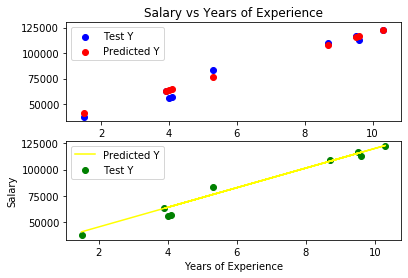

In [26]:
    main()

### References taken from 
https://corporatefinanceinstitute.com/resources/knowledge/other/elastic-net/
\
https://www.geeksforgeeks.org/implementation-of-elastic-net-regression-from-scratch/